In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install fsspec

     |████████████████████████████████| 125 kB 38.0 MB/s 


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import matplotlib.dates as mdates

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('stopwords')
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, TweetTokenizer
from nltk.corpus import stopwords

from collections import Counter
from tqdm import tqdm
import os
import random
import re
import string
import pickle
import json
from io import StringIO

import networkx as nx

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
PROJECT_NAME = "Kim Seon Ho"
DATASET_PATH = "/content/drive/MyDrive/Data/Dataset/KimSeonHo"

In [21]:
!cp -r "$DATASET_PATH" .

In [23]:
!cp -r "/content/drive/Shareddrives/Kementerian Analisis Digital - BEM KM UGM 2021/Riset Digital/Utility/Dataset/new_kamusalay.csv" .

In [22]:
alay_dict = pd.read_csv('/content/drive/Shareddrives/Kementerian Analisis Digital - BEM KM UGM 2021/Riset Digital/Utility/Dataset/new_kamusalay.csv', encoding='latin-1', header=None)
alay_dict = alay_dict.rename(columns={0: 'original', 
                                      1: 'replacement'})

idn_stopwords = stopwords.words('indonesian')

In [24]:
alay_dict

,original,replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
...,...,...
15162,mendikbud,menteri pendidikan dan kebudayaan
15163,mendag,menteri perdagangan
15164,menaker,menteri tenaga kerja
15165,memetwit,mentwit


In [25]:
df_raw = pd.read_json(f"/content/drive/MyDrive/Data/Dataset/KimSeonHo/{PROJECT_NAME}_raw.json")

df_valid = pd.concat([df_raw])
df_valid["date_old"] = df_valid["date"]
df_valid["date"] = pd.to_datetime(df_valid["created_at"]).dt.tz_localize('UTC').dt.tz_convert('Asia/Jakarta')

print(df_valid.shape)
df_valid.sample(20)

(137444, 37)


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,date_old
3105,1454499716553601024,1454499716553601024,2021-10-30 17:25:30,2021-10-31 00:25:30+07:00,17:25:30,0,564871062,yscipher,ASH,,"The reason why I like Hong Banjang character is because it’s remind me a lot of old Kdrama vibes. Not really rich, rational, simple, easy to approach just like a neighbourhood oppa kind of vibes.#KimSeonHo",en,[],[],[],0,0,16,[kimseonho],[],https://twitter.com/yscipher/status/1454499716553601024,False,,0,,,,,,,,[],,,,,2021-10-30
129816,1451792490160291840,1451773567633330176,2021-10-23 06:07:57,2021-10-23 13:07:57+07:00,06:07:57,0,24145001,amiecumi,Amie,,@KingSeonhos @SC40424898 I believe he just needs some time. Kim seon ho...we'll be waiting for you patiently. Take your time! 💚💚💚,en,[],[],[],0,0,0,[],[],https://twitter.com/amiecumi/status/1451792490160291840,False,,0,,,,,,,,"[{'screen_name': 'KingSeonhos', 'name': 'andie ◡̈', 'id': '1340528681605685248'}, {'screen_name': 'SC40424898', 'name': 'SC', 'id': '1240067314164383747'}]",,,,,2021-10-23
109726,1452311829766709248,1452311829766709248,2021-10-24 16:31:37,2021-10-24 23:31:37+07:00,16:31:37,0,1259494633807114240,seonho_kae,Kae~SeonHo_never leave you behind 💚,,Dan ini baru satu minggu.... Damn,in,[],[],[],0,0,0,[],[],https://twitter.com/Seonho_kae/status/1452311829766709248,False,,0,,,,,,,,[],,,,,2021-10-24
51515,1453029322239799298,1453029322239799296,2021-10-26 16:02:41,2021-10-26 23:02:41+07:00,16:02:41,0,461799120,mirafauz,Meow,,PENGEN PELUK PUKPUK SEONHO PLISSSS😭😭😭😭😭😭😭😭😭,in,[],[],[],0,0,0,[],[],https://twitter.com/Mirafauz/status/1453029322239799298,False,,0,,,,,,,,[],,,,,2021-10-26
10527,1454123469008900097,1454123327262367744,2021-10-29 16:30:25,2021-10-29 23:30:25+07:00,16:30:25,0,1450118674216484864,deep_sna_ke__,DEEP YONG🐍,,@dusik_blanket 거우리애이름이 도존씨일수도 있죠...! 이름을 뭘봐씨발씨로 지을순없잖아요,ko,[],[],[],1,0,0,[],[],https://twitter.com/Deep_Sna_ke__/status/1454123469008900097,False,,0,,,,,,,,"[{'screen_name': 'dusik_blanket', 'name': 'DUDU', 'id': '1414221542024630277'}]",,,,,2021-10-29
126701,1451865790471282692,1451865790471282688,2021-10-23 10:59:13,2021-10-23 17:59:13+07:00,10:59:13,0,1446567502142586882,_seonho__k,💭,,#김선호 굿즈 양도 받아요!! 탈덕하신분들 많으실거같아서 ㅎㅎ 저한테 다 양도해주시면 됩니다!! 그냥 아무거나 디엠 주시면..!! 받으러 갈게요➰ 디엠 주세요!!,ko,[],[],[],0,0,7,[김선호],[],https://twitter.com/_seonho__K/status/1451865790471282692,False,,0,,,,,,,,[],,,,,2021-10-23
50041,1453046063984611328,1453046063984611328,2021-10-26 17:09:12,2021-10-27 00:09:12+07:00,17:09:12,0,1004832950783918082,abcodh,rin,,salutt sm seonho😭💜,in,[],[],[],0,0,0,[],[],https://twitter.com/abcodh/status/1453046063984611328,False,,0,,,,,,,,[],,,,,2021-10-26
128091,1451831848338812928,1451828839982665728,2021-10-23 08:44:21,2021-10-23 15:44:21+07:00,08:44:21,0,1389396581078601729,zhel110130,I still support kim seon-ho 💚,,@seonhobestboiii @seonhohada00_ oh thanks 😊,en,[],[],[],0,0,0,[],[],https://twitter.com/zhel110130/status/1451831848338812928,False,,0,,,,,,,,"[{'screen_name': 'seonhobestboiii', 'name': 'ace◡̈', 'id': '1430392423989923843'}, {'screen_name': 'seonhohada00_', 'name': 'see you soon, KSH.', 'id': '1450695900246921216'}]",,,,,2021-10-23
35855,1453379088144482310,1453379088144482304,2021-10-27 15:12:31,2021-10-27 22:12:31+07:00,15:12:31,0,1132997578281218048,kkayamopaba,SEONHOMIDA,,"Thank you for messaging me and appreciating my work for the donation drive. This is the only thing I can do to help fellow seonhohada.Hearing ""good job"" ""appreciate you"" ""thank you for doing these"". It humbles my heart. Surely this fandom are so touching 🥺 I wish Seonho knows it",en,[],[],[],2,8,35,[],[],https://twitter.com/kkayamopaba/status/1453379088144482310,False,,0,,,,,,,,[],,,,,2021-10-27
6713,14543654424

In [ ]:
df_raw.shape

(137444, 36)

In [26]:
df_valid = df_valid.drop_duplicates(["id", "tweet"])

print(df_valid.shape)

(136034, 37)


In [27]:
df_clean = df_valid.copy()

In [ ]:
df_clean

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,date_old
0,1454685991600492550,1454685123018780672,2021-10-31 05:45:41,2021-10-31 12:45:41+07:00,05:45:41,0,1451153246022619147,shb0508,나도 추가시간을 줄게 (🚨aaa투표🚨),,@seonho_05_8 안대여ㅠㅜㅜ울지 마…,ko,[],[],[],0,0,0,[],[],https://twitter.com/shb0508/status/1454685991600492550,False,,0,,,,,,,,"[{'screen_name': 'seonho_05_8', 'name': '달로🌙', 'id': '1449698693255294979'}]",,,,,2021-10-31
1,1454685988765114370,1454685215108993024,2021-10-31 05:45:41,2021-10-31 12:45:41+07:00,05:45:41,0,1450683989740556296,s__ho58,(투표하셨나요?)김파랑🔥,,@mild_seonho 선호야 제바아아알 ㅇㅣㅇ,ko,[],[],[],0,0,0,[],[],https://twitter.com/s__ho58/status/1454685988765114370,False,,0,,,,,,,,"[{'screen_name': 'mild_seonho', 'name': '짜리', 'id': '1451175319570817024'}]",,,,,2021-10-31
2,1454685940073447424,1454684740154392576,2021-10-31 05:45:29,2021-10-31 12:45:29+07:00,05:45:29,0,1344620770874408960,seonho_cherry,"(트친소, 이벵중) 체리🍒",,@yebbosiregi 진짜 눈물난ㄷㅏ..,ko,[],[],[],0,0,0,[],[],https://twitter.com/seonho_cherry/status/1454685940073447424,False,,0,,,,,,,,"[{'screen_name': 'yebbosiregi', 'name': '히로', 'id': '1447538655300489216'}]",,,,,2021-10-31
3,1454685937909178373,1454685156120272896,2021-10-31 05:45:29,2021-10-31 12:45:29+07:00,05:45:29,0,1324971934082244610,dearlove_seonho,ᰔ디얼럽선호ᰔ,,@nt_seonho 네 맞아요 월요일이더라구요...,ko,[],[],[],0,0,0,[],[],https://twitter.com/dearlove_seonho/status/1454685937909178373,False,,0,,,,,,,,"[{'screen_name': 'nt_seonho', 'name': '낙타하다◡̈', 'id': '1447514200574595072'}]",,,,,2021-10-31
4,1454685935086419971,1454642417819213824,2021-10-31 05:45:28,2021-10-31 12:45:28+07:00,05:45:28,0,1376244762131398657,mystery04607281,Mystery girl,,@seonho_dusik @thelightedfia If we don’t report it will spread more,en,[],[],[],0,0,0,[],[],https://twitter.com/Mystery04607281/status/1454685935086419971,False,,0,,,,,,,,"[{'screen_name': 'seonho_dusik', 'name': '2D1N 사랑해 | 6/6', 'id': '1348571036'}, {'screen_name': 'thelightedfia', 'name': 'Eidel B.', 'id': '1291686134364303360'}]",,,,,2021-10-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137439,1451607812832849925,1451607552945393664,2021-10-22 17:54:06,2021-10-23 00:54:06+07:00,17:54:06,0,1451588673154084864,very__seonho,선호할래,,@shb0508 방송 듣고만 있엇지만ㅠㅠ 진짜 넘 맴찢이라 잠도 못자고ㅠㅠ,ko,[],[],[],1,0,1,[],[],https://twitter.com/very__seonho/status/1451607812832849925,False,,0,,,,,,,,"[{'screen_name': 'shb0508', 'name': '나도 추가시간을 줄게 (🚨aaa투표🚨)', 'id': '1451153246022619147'}]",,,,,2021-10-22
137440,1451607755354214411,1451607755354214400,2021-10-22 17:53:53,2021-10-23 00:53:53+07:00,17:53:53,0,1060123861168148482,jcwooki,Agasshi (아가씨),,Kim seon honun skandalı halt etmiş jshsbsbsbsbsbsn,tr,[],[],[],0,0,1,[],[],https://twitter.com/jcwooki/status/1451607755354214411,False,https://twitter.com/gazetesozcu/status/1451528863012593669,0,,,,,,,,[],,,,,2021-10-22
137441,1451607738199334913,1451607738199334912,2021-10-22 17:53:49,2021-10-23 00:53:49+07:00,17:53:49,0,1451329434099720194,teamseonho1,SaySeonho💚📸,,I am more than moved that many of his friends were defending him! 💚💚💚😭😭😭 #Kimseonho #KimSeonHoInternationalFandom,en,[],[],[],0,0,3,"[kimseonho, kimseonhointernationalfandom]",[],https://twitter.com/TEAMSEONHO1/status/1451607738199334913,False,https://twitter.com/SeonhoCharts/status/1451584179213254659,0,,,,,,,,[],,,,,2021-10-22
137442,1451607731899666447,1451607731899666432,2021-10-22 17:53:47,2021-10-23 00:53:47+07:00,17:53:47,0,1351109194892648449,saso46684888,Sa so seon ho,,#KimSeonHo #ProtectKimSeonHo,und,[],[],[],0,0,2,"[kimseonho, protectkimseonho]",[],https://twitter.com/SaSo46684888/status/1451607731899666447,False,https://twitter.com/sond

In [28]:
tweet_tokenizer = TweetTokenizer()

def tokenize_tweet(text):
  return " ".join(tweet_tokenizer.tokenize(text))

def remove_unnecessary_char(text):
  text = re.sub("\[USERNAME\]", " ", text)
  text = re.sub("\[URL\]", " ", text)
  text = re.sub("\[SENSITIVE-NO\]", " ", text)
  text = re.sub('  +', ' ', text)
  return text

def preprocess_tweet(text):
  text = re.sub('\n',' ',text) # Remove every '\n'
  # text = re.sub('rt',' ',text) # Remove every retweet symbol
  text = re.sub('^(\@\w+ ?)+',' ',text)
  text = re.sub(r'\@\w+',' ',text) # Remove every username
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
  text = re.sub('/', ' ', text)
  # text = re.sub(r'[^\w\s]', '', text)
  text = re.sub('  +', ' ', text) # Remove extra spaces
  return text

alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))

def normalize_alay(text):
  return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])
    
def remove_nonaplhanumeric(text):
  text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
  return text

def remove_stopword(text):
  text = ' '.join(['' if word in idn_stopwords else word for word in text.split(' ')])
  text = re.sub('  +', ' ', text)
  text = text.strip()
  return text

print("remove_nonaplhanumeric: ", remove_nonaplhanumeric("Halooo,,,,, duniaa!!"))
print("lowercase: ", ("Halooo, duniaa!".lower()))
print("remove_unnecessary_char: ", remove_unnecessary_char("Hehe\n\n RT USER USER apa kabs www.google.com\n  hehe"))
print("normalize_alay: ", normalize_alay("@Jokowi jokowi aamiin adek abis"))
print("normalize_alay: ", remove_unnecessary_char("@Jokowi jokowi aamiin adek abis"))

remove_nonaplhanumeric:  Halooo duniaa 
lowercase:  halooo, duniaa!
remove_unnecessary_char:  Hehe

 RT USER USER apa kabs www.google.com
 hehe
normalize_alay:  @Jokowi jokowi amin adik habis
normalize_alay:  @Jokowi jokowi aamiin adek abis


In [29]:
def preprocess(text, alay = False, tweet = False):
  if(tweet):
    text = preprocess_tweet(text)
  text = remove_unnecessary_char(text)
  text = text.lower()
  text = tokenize_tweet(text)
  if (alay):
    text = normalize_alay(text)
  return text

In [30]:
# df_clean["sliced_text"] = [s[r[0]:r[1]] for s,r in zip(df_clean["full_text"], df_clean["display_text_range"])]
df_clean["clean_text"] = df_clean["tweet"].apply(preprocess, args = (True, True,))
df_clean["no_stopword_text"] = df_clean["clean_text"].apply(remove_nonaplhanumeric).apply(remove_stopword)

df_clean[["id", "tweet", "clean_text", "no_stopword_text"]].head(50)

,id,tweet,clean_text,no_stopword_text
0,1454685991600492550,@seonho_05_8 안대여ㅠㅜㅜ울지 마…,안대여ㅠㅜㅜ울지 마 …,
1,1454685988765114370,@mild_seonho 선호야 제바아아알 ㅇㅣㅇ,선호야 제바아아알 ㅇㅣㅇ,
2,1454685940073447424,@yebbosiregi 진짜 눈물난ㄷㅏ..,진짜 눈물난ㄷㅏ ..,
3,1454685937909178373,@nt_seonho 네 맞아요 월요일이더라구요...,네 맞아요 월요일이더라구요 ...,
4,1454685935086419971,@seonho_dusik @thelightedfia If we don’t report it will spread more,if we don ’ t laporan it will spread more,if we don t laporan it will spread more
5,1454685898948284422,CAKEP BANGETTTT,cakap banget,cakap banget
6,1454685898357018624,@BernadetteTras3 @athenaagirl This incident ruined everything for me.. I have no interest in k dramas anymore.. The treatment #KimSeonHo received for something so personal frightens me to root for any other k celeb .. scary !,this incident ruined everything for me .. i have no interest in k dramas anymore .. the treatment #kimseonho received for something sok personal frightens me to root for any other k celeb .. scary !,this incident ruined everything for me i have no interest in k dramas anymore the treatment kimseonho received for something sok personal frightens me to root for any other k celeb scary
7,1454685888550559744,하 저 이성이 좀 돌아왔어요 좀 피눈물은 나지만 1000명으로 결정나도 이해할 수 있을것 같아요 상처주고 나간 인간들만 다시 들어가지만 마라 기웃대지도 마라,하 저 이성이 좀 돌아왔어요 좀 피눈물은 나지만 1000명으로 결정나도 이해할 수 있을것 같아요 상처주고 나간 인간들만 다시 들어가지만 마라 기웃대지도 마라,1000
8,1454685839296917506,@s__ho58 진짜 고독방에 다 들어와줬음 하네요..,진짜 고독방에 다 들어와줬음 하네요 ..,
9,1454685814114308098,"#2D1NSS4 Since Ep96, KBS's reason to cut-off the airtime of #KimSeonHo is ""for the comfort of the audience"" so KBS and Team have to accept the reflection effect ""when the audience is uncomfortable to watch"" because the best reason for watching a variety show is funny not Sympathy https://t.co/G4jxO0Hhd7","#2d1nss4 sejak ep96 , kbs's reason to cut-off the airtime of #kimseonho is "" for the comfort of the audience "" sok kbs and tim have to accept the reflection effect "" when the audience is uncomfortable to watch "" soalnya the best reason for menonton a variety show is funny not sympathy",2d1nss4 ep96 kbs s reason to cut off the airtime of kimseonho is for the comfort of the audience sok kbs and tim have to accept the reflection effect when the audience is uncomfortable to watch the best reason for menonton a variety show is funny not sympathy


In [ ]:
df_tsv = pd.DataFrame(data = {"id" : df_clean["id"], "text" : df_clean["clean_text"]}).reset_index().drop(["index"], axis=1)
df_tsv["sentiment"] = "neutral"

df_tsv.sample(20)

,id,text,sentiment
84659,1452856918679064577,,neutral
80110,1452872761563508736,imajinasi if seonho becomes the pagi angel on one episode and stays in the shows afterward . 😭,neutral
73061,1452901177398419459,"menangis bayangkan jadi kim seon oh , pasti tertekan banget punya cewek kayak miss a :( sudah adalah di selingkuhan ya kan .",neutral
125362,1451888882287448072,#kimseonho,neutral
45655,1453167018929111041,"dispatch reveló una linea del tiempo sobre lah verdadera relación entre lah ex iya seonho con pruebas iya testimonios deh los amigos deh kasih iya deh ella , al final él nunca le hizo daño psicológico , aca te dejo ujian nasional video con lah info",neutral
55606,1452997011825889285,kim seon oh the best man ! ! !,neutral
27934,1453643008620990469,memilih #김선호 #kimseonho 💚,neutral
126733,1451865231546716163,เก ื อบส ่ งเมลล ์ แฟนอาร ์ ตไปบ ้ านมายไม ่ ท ั น 😭,neutral
23791,1453719633018507277,ikot ikot lang ikot ikot ikot langggg ikot ikot lang ikot ikot ikooot ~,neutral
31313,1453570879510568962,"i don ’ t know apa ’ si terjadi to me , i don ’ t even need the everwhite kit produk , but soalnya seonho ’ si the one who endorsed it i ’ sama willing to buy 😭 🥺 #kimseonho",neutral


In [ ]:
df_tsv.to_json("/content/drive/MyDrive/Data/Dataset/KimSeonHo/clean.json")

In [3]:
!git clone https://github.com/indobenchmark/indonlu
%cd indonlu
!pip install -r examples/requirements.txt

Cloning into 'indonlu'...
remote: Enumerating objects: 427, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 427 (delta 14), reused 30 (delta 14), pack-reused 394
Receiving objects: 100% (427/427), 4.83 MiB | 14.71 MiB/s, done.
Resolving deltas: 100% (209/209), done.
/content/indonlu
     |████████████████████████████████| 3.1 MB 5.4 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 895 kB 44.8 MB/s 
     |████████████████████████████████| 3.3 MB 28.7 MB/s 
     |████████████████████████████████| 596 kB 36.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
import os, sys

import random
import numpy as np
import pandas as pd
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch import optim

import transformers
from transformers import BertForSequenceClassification, BertTokenizer, BertConfig
from transformers import AlbertForSequenceClassification, AlbertTokenizer, AlbertConfig
from nltk.tokenize import TweetTokenizer, word_tokenize

# from utils.forward_fn import forward_sequence_classification
from utils.metrics import document_sentiment_metrics_fn
from utils.data_utils import DocumentSentimentDataset, DocumentSentimentDataLoader
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split

In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

class focal_loss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2, num_classes = 3, size_average=True):
        """
        focal_loss损失函数, -α(1-yi)**γ *ce_loss(xi,yi)
        步骤详细的实现了 focal_loss损失函数.
        :param alpha:   阿尔法α,类别权重.      当α是列表时,为各类别权重,当α为常数时,类别权重为[α, 1-α, 1-α, ....],常用于 目标检测算法中抑制背景类 , retainnet中设置为0.25
        :param gamma:   伽马γ,难易样本调节参数. retainnet中设置为2
        :param num_classes:     类别数量
        :param size_average:    损失计算方式,默认取均值
        """
        super(focal_loss,self).__init__()
        self.size_average = size_average
        if isinstance(alpha,list):
            assert len(alpha)==num_classes   # α可以以list方式输入,size:[num_classes] 用于对不同类别精细地赋予权重
            # print(" --- Focal_loss alpha = {}, 将对每一类权重进行精细化赋值 --- ".format(alpha))
            self.alpha = torch.Tensor(alpha)
        else:
            assert alpha<1   #如果α为一个常数,则降低第一类的影响,在目标检测中为第一类
            # print(" --- Focal_loss alpha = {} ,将对背景类进行衰减,请在目标检测任务中使用 --- ".format(alpha))
            self.alpha = torch.zeros(num_classes)
            self.alpha[0] += alpha
            self.alpha[1:] += (1-alpha) # α 最终为 [ α, 1-α, 1-α, 1-α, 1-α, ...] size:[num_classes]

        self.gamma = gamma

    def forward(self, preds, labels):
        """
        focal_loss损失计算
        :param preds:   预测类别. size:[B,N,C] or [B,C]    分别对应与检测与分类任务, B 批次, N检测框数, C类别数
        :param labels:  实际类别. size:[B,N] or [B]
        :return:
        """
        # assert preds.dim()==2 and labels.dim()==1
        preds = preds.view(-1,preds.size(-1))
        self.alpha = self.alpha.to(preds.device)
        preds_logsoft = F.log_softmax(preds, dim=1) # log_softmax
        preds_softmax = torch.exp(preds_logsoft)    # softmax

        preds_softmax = preds_softmax.gather(1,labels.view(-1,1))   # 这部分实现nll_loss ( crossempty = log_softmax + nll )
        preds_logsoft = preds_logsoft.gather(1,labels.view(-1,1))
        self.alpha = self.alpha.gather(0,labels.view(-1))
        loss = -torch.mul(torch.pow((1-preds_softmax), self.gamma), preds_logsoft)  # torch.pow((1-preds_softmax), self.gamma) 为focal loss中 (1-pt)**γ

        loss = torch.mul(self.alpha, loss.t())
        if self.size_average:
            loss = loss.mean()
        else:
            loss = loss.sum()
        return loss

loss_fn = focal_loss(alpha=0.25, gamma=2, num_classes=3)

def forward_sequence_classification(model, batch_data, i2w, is_test=False, device='cpu', **kwargs):
    # Unpack batch data
    if len(batch_data) == 3:
        (subword_batch, mask_batch, label_batch) = batch_data
        token_type_batch = None
    elif len(batch_data) == 4:
        (subword_batch, mask_batch, token_type_batch, label_batch) = batch_data
    
    # Prepare input & label
    subword_batch = torch.LongTensor(subword_batch)
    mask_batch = torch.FloatTensor(mask_batch)
    token_type_batch = torch.LongTensor(token_type_batch) if token_type_batch is not None else None
    label_batch = torch.LongTensor(label_batch)
            
    if device == "cuda":
        subword_batch = subword_batch.cuda()
        mask_batch = mask_batch.cuda()
        token_type_batch = token_type_batch.cuda() if token_type_batch is not None else None
        label_batch = label_batch.cuda()

    # Forward model
    outputs = model(subword_batch, attention_mask=mask_batch, token_type_ids=token_type_batch, labels=label_batch)

    loss, logits = outputs[:2]

    output = F.softmax(logits, dim=1)

    f_loss = loss_fn(output, label_batch)
    
    # generate prediction & label list
    list_hyp = []
    list_label = []
    hyp = torch.topk(logits, 1)[1]
    for j in range(len(hyp)):
        list_hyp.append(i2w[hyp[j].item()])
        list_label.append(i2w[label_batch[j][0].item()])
        
    return f_loss, list_hyp, output, list_label

In [6]:
class DocumentSentimentDataset(Dataset):
    # Static constant variable
    LABEL2INDEX = {'positive': 0, 'neutral': 1, 'negative': 2}
    INDEX2LABEL = {0: 'positive', 1: 'neutral', 2: 'negative'}
    NUM_LABELS = 3
    
    def load_dataset(self, path): 
        df = pd.read_json(path)
        # df.columns = ['text','sentiment']
        df['sentiment'] = df['sentiment'].apply(lambda lab: self.LABEL2INDEX[lab])
        return df
    
    def __init__(self, dataset_path, tokenizer, no_special_token=False, *args, **kwargs):
        self.data = self.load_dataset(dataset_path)
        self.tokenizer = tokenizer
        self.no_special_token = no_special_token
    
    def __getitem__(self, index):
        data = self.data.loc[index,:]
        text, sentiment = data['text'], data['sentiment']
        subwords = self.tokenizer.encode(text, add_special_tokens=not self.no_special_token)
        return np.array(subwords), np.array(sentiment), data['text']
    
    def __len__(self):
        return len(self.data) 

In [7]:
def set_seed(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    
def count_param(module, trainable=False):
    if trainable:
        return sum(p.numel() for p in module.parameters() if p.requires_grad)
    else:
        return sum(p.numel() for p in module.parameters())
    
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def metrics_to_string(metric_dict):
    string_list = []
    for key, value in metric_dict.items():
        string_list.append('{}:{:.4f}'.format(key, value))
    return ' '.join(string_list)

In [8]:
# Set random seed
SEED = 28012021
set_seed(SEED)
NUM_LABELS = DocumentSentimentDataset.NUM_LABELS
VALIDATION_SPLIT = 0.1
SPLIT_TRAIN = True

TASK_NAME = "SmSa"
# MODEL_NAME = "indobenchmark/indobert-lite-base-p1"
MODEL_NAME = "indobenchmark/indobert-large-p1"
CHECKPOINT_NAME = "checkpoint_v7_928"
MODEL_PATH = "/content/drive/Shareddrives/Kementerian Analisis Digital - BEM KM UGM 2021/Riset Digital/Utility/Model/IndoBERT/"
WEIGHT_PATH = MODEL_PATH + "Weights/" + CHECKPOINT_NAME

PREDICTIONS_VERSION = "v7"
DIR_CHECKPOINT = "checkpoint_{}_{}".format(TASK_NAME, PREDICTIONS_VERSION)

In [9]:
!cp -R "$WEIGHT_PATH" .

In [10]:
# Load Tokenizer and Config
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
config = BertConfig.from_pretrained(CHECKPOINT_NAME)
# config = AlbertConfig.from_pretrained(CHECKPOINT_NAME)

# Instantiate model
model = BertForSequenceClassification.from_pretrained(CHECKPOINT_NAME, config=config)
# model = AlbertForSequenceClassification.from_pretrained(CHECKPOINT_NAME, config=config)

Downloading:   0%|          | 0.00/224k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.50k [00:00<?, ?B/s]

In [11]:
clean_dataset_path = '/content/drive/MyDrive/Data/Dataset/KimSeonHo/clean.json'

In [12]:
clean_dataset = DocumentSentimentDataset(clean_dataset_path, tokenizer, lowercase=True)

clean_loader = DocumentSentimentDataLoader(dataset=clean_dataset, max_seq_len=512, batch_size=16, num_workers=2, shuffle=False) 

In [13]:
w2i, i2w = DocumentSentimentDataset.LABEL2INDEX, DocumentSentimentDataset.INDEX2LABEL
print(w2i)
print(i2w)

{'positive': 0, 'neutral': 1, 'negative': 2}
{0: 'positive', 1: 'neutral', 2: 'negative'}


In [14]:
model = model.cuda()
# Prediksi
model.eval()
torch.set_grad_enabled(False)

total_loss, total_correct, total_labels = 0, 0, 0
list_hyp, list_label = [], []
list_loss = []
list_out = []

pbar = tqdm(clean_loader, leave=True, total=len(clean_loader))
for i, batch_data in enumerate(pbar):
    batch_loss, batch_hyp, batch_out, _ = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')
    list_hyp += batch_hyp
    list_loss.append(batch_loss)
    list_out.extend(batch_out)

100%|██████████| 8503/8503 [1:13:08<00:00,  1.94it/s]


In [15]:
assert len(list_out) == len(list_hyp)

In [16]:
confidence, predicted_class = torch.max(list_out[0], dim=-1)

print(confidence, predicted_class)

tensor(0.9858, device='cuda:0') tensor(1, device='cuda:0')


In [17]:
list_conf = [torch.max(out, dim=-1)[0].item() for out in list_out]

In [18]:
df_pred = pd.DataFrame({'sentimen' : list_hyp, 'confidence' : list_conf}).reset_index(drop=True)

df_pred.head(20)

,sentimen,confidence
0,neutral,0.985829
1,neutral,0.985829
2,neutral,0.999064
3,neutral,0.999299
4,neutral,0.998765
5,positive,0.999980
6,negative,0.999968
7,neutral,0.994832
8,neutral,0.998900
9,positive,0.998841


In [31]:
df_tmp = pd.concat([df_clean.reset_index(drop=True), df_pred.reset_index(drop=True)], axis = 1)
df_tmp

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,date_old,clean_text,no_stopword_text,sentimen,confidence
0,1454685991600492550,1454685123018780672,2021-10-31 05:45:41,2021-10-31 12:45:41+07:00,05:45:41,0,1451153246022619147,shb0508,나도 추가시간을 줄게 (🚨aaa투표🚨),,@seonho_05_8 안대여ㅠㅜㅜ울지 마…,ko,[],[],[],0,0,0,[],[],https://twitter.com/shb0508/status/1454685991600492550,False,,0,,,,,,,,"[{'screen_name': 'seonho_05_8', 'name': '달로🌙', 'id': '1449698693255294979'}]",,,,,2021-10-31,안대여ㅠㅜㅜ울지 마 …,,neutral,0.985829
1,1454685988765114370,1454685215108993024,2021-10-31 05:45:41,2021-10-31 12:45:41+07:00,05:45:41,0,1450683989740556296,s__ho58,(투표하셨나요?)김파랑🔥,,@mild_seonho 선호야 제바아아알 ㅇㅣㅇ,ko,[],[],[],0,0,0,[],[],https://twitter.com/s__ho58/status/1454685988765114370,False,,0,,,,,,,,"[{'screen_name': 'mild_seonho', 'name': '짜리', 'id': '1451175319570817024'}]",,,,,2021-10-31,선호야 제바아아알 ㅇㅣㅇ,,neutral,0.985829
2,1454685940073447424,1454684740154392576,2021-10-31 05:45:29,2021-10-31 12:45:29+07:00,05:45:29,0,1344620770874408960,seonho_cherry,"(트친소, 이벵중) 체리🍒",,@yebbosiregi 진짜 눈물난ㄷㅏ..,ko,[],[],[],0,0,0,[],[],https://twitter.com/seonho_cherry/status/1454685940073447424,False,,0,,,,,,,,"[{'screen_name': 'yebbosiregi', 'name': '히로', 'id': '1447538655300489216'}]",,,,,2021-10-31,진짜 눈물난ㄷㅏ ..,,neutral,0.999064
3,1454685937909178373,1454685156120272896,2021-10-31 05:45:29,2021-10-31 12:45:29+07:00,05:45:29,0,1324971934082244610,dearlove_seonho,ᰔ디얼럽선호ᰔ,,@nt_seonho 네 맞아요 월요일이더라구요...,ko,[],[],[],0,0,0,[],[],https://twitter.com/dearlove_seonho/status/1454685937909178373,False,,0,,,,,,,,"[{'screen_name': 'nt_seonho', 'name': '낙타하다◡̈', 'id': '1447514200574595072'}]",,,,,2021-10-31,네 맞아요 월요일이더라구요 ...,,neutral,0.999299
4,1454685935086419971,1454642417819213824,2021-10-31 05:45:28,2021-10-31 12:45:28+07:00,05:45:28,0,1376244762131398657,mystery04607281,Mystery girl,,@seonho_dusik @thelightedfia If we don’t report it will spread more,en,[],[],[],0,0,0,[],[],https://twitter.com/Mystery04607281/status/1454685935086419971,False,,0,,,,,,,,"[{'screen_name': 'seonho_dusik', 'name': '2D1N 사랑해 | 6/6', 'id': '1348571036'}, {'screen_name': 'thelightedfia', 'name': 'Eidel B.', 'id': '1291686134364303360'}]",,,,,2021-10-31,if we don ’ t laporan it will spread more,if we don t laporan it will spread more,neutral,0.998765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136029,1451607812832849925,1451607552945393664,2021-10-22 17:54:06,2021-10-23 00:54:06+07:00,17:54:06,0,1451588673154084864,very__seonho,선호할래,,@shb0508 방송 듣고만 있엇지만ㅠㅠ 진짜 넘 맴찢이라 잠도 못자고ㅠㅠ,ko,[],[],[],1,0,1,[],[],https://twitter.com/very__seonho/status/1451607812832849925,False,,0,,,,,,,,"[{'screen_name': 'shb0508', 'name': '나도 추가시간을 줄게 (🚨aaa투표🚨)', 'id': '1451153246022619147'}]",,,,,2021-10-22,방송 듣고만 있엇지만ㅠㅠ 진짜 넘 맴찢이라 잠도 못자고ㅠㅠ,,neutral,0.989654
136030,1451607755354214411,1451607755354214400,2021-10-22 17:53:53,2021-10-23 00:53:53+07:00,17:53:53,0,1060123861168148482,jcwooki,Agasshi (아가씨),,Kim seon honun skandalı halt etmiş jshsbsbsbsbsbsn,tr,[],[],[],0,0,1,[],[],https://twitter.com/jcwooki/status/1451607755354214411,False,https://twitter.com/gazetesozcu/status/1451528863012593669,0,,,,,,,,[],,,,,2021-10-22,kim seon honun skandalı halt etmiş jshsbsbsbsbsbsn,kim seon honun skandal halt etmi jshsbsbsbsbsbsn,neutral,0.999654
136031,1451607738199334913,1451607738199334912,2021-10-22 17:53:49,2021-10-23 00:53:49+07:00,17:53:49,0,1451329434099720194,teamseonho1,SaySeonho💚📸,,I am more than moved that many of his friends were defending him! 💚💚💚😭😭😭 #Kimseonho #KimSeonHoInternationalFandom,en,[],[],[],0,0,3,"[kimseonho, kimseonhointernationalfandom]",[],https://twitter.

In [32]:
df_bak = pd.concat([df_tmp]).drop_duplicates(subset=["id"])
df_bak.index = range(len(df_bak))
df_sentimen = df_bak

df_sentimen.sort_values(by=['likes_count'], ascending=False)[["id", "tweet", "username", "likes_count", "sentimen", "confidence"]].head(50)

,id,tweet,username,likes_count,sentimen,confidence
88619,1452844210734780417,Resume tersingkat berita dispatch soal Kim Seon Ho : Kim Seon Ho adalah Yoo Nabi. Sedangkan mbak A adalah Park Jae-eon. Seonho : gue maafin. Gakan bohong lagi kan? Mbak A : iya Seonho : (percaya) penonton: GBLOOOOKKKKKKK,arganhope,71521,negative,0.855652
90432,1452837956075487233,"seonho tutup aibmu, tapi dispatch ngebongkar semua.",minovara_,58134,negative,0.999967
93565,1452826985961385985,KIRAINN YOO NABI DAH PALING PABOO TERNYATA ADA SEONHO KIM,shtteokbokki,44538,negative,0.999567
89248,1452842186207207426,Dispatch Reveals Details About Kim Seon Ho And His Ex-Girlfriend’s Relationship https://t.co/WhR66aEQKA https://t.co/PbfxIrEZjr,soompi,43837,neutral,0.999956
84816,1452856423956705285,"seonho bisa bisanya ya karir udah di ujung jurang udah di hujat seantero negeri tapi masih tetep diam buat ngelindungin si mbak nya, untuk pertama kalinya gue mau sungkem terima kasih banget sama dispatch",nengky888,37872,negative,0.999971
96996,1452811202875191297,i cannot grasp the fact that The dispatch really spilled tea FOR seonho and backed him up.. dispatch that always ruins people's career it's now trying to save one i--,jipyeonq,30271,neutral,0.900610
89759,1452840382199263237,Seonho bucinnya udh tingkat level paling tinggi dari permintaan maafnya dia ga ada ngespill tentang keburukan cewenya dia cuma bilang “aku berkencan dgnnya berdasarkan cinta dan dalam perjalananya aku menyakitinya karena kekurangan dan tindakanku” DUH GUSTI BUCIN BANGET MENGCAPE,nengky888,29665,negative,0.999988
74624,1452894939688300554,"ngorbanin karirnya dan di hujat seantero negeri buat ngelindungin mantannya yang playvictim ini namanya ANOTHER LEVEL OF GBLOK SEONHO KIM PLEASEEEEEEEE SADAR JANGAN BUCIN SAMPE BIKIN KAMU BEGO, DUHHH GEMES GUE PENGEN GUE KLEPAK PALANYA BIAR SADAR",nengky888,28879,negative,0.999981
82629,1452863821983350793,•kdm• kim seonho 🤝 yoo nabi https://t.co/Xi8RByYQVK,kdrama_menfess,28752,neutral,0.999815
98398,1452803056718913536,Seonho is really dusik in real life,seonhoquack,27942,neutral,0.922882


In [33]:
df_sentimen["sentimen"].value_counts()

neutral     76645
negative    37703
positive    21686
Name: sentimen, dtype: int64

In [34]:
df_sentimen.loc[df_sentimen["clean_text"].str.len() <= 1, "sentimen"] = "neutral"

df_sentimen["sentimen"].value_counts()

neutral     77952
negative    36396
positive    21686
Name: sentimen, dtype: int64

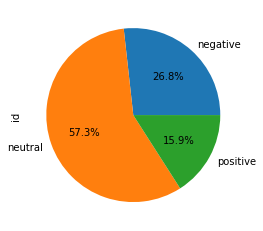

In [35]:
tmp = df_sentimen.groupby(["sentimen"])["id"].count()

tmp.plot.pie(autopct="%.1f%%");

In [36]:
tmp = df_sentimen.groupby(["tweet", "sentimen"])["id"].size().to_frame("count").reset_index()

tmp.sort_values(by = ["count"], ascending = False).head(50)

,tweet,sentimen,count
1673,#KimSeonHo,neutral,858
3545,#KimSeonHo | #김선호,neutral,322
3656,#KimSeonHo 💚,neutral,145
2300,#KimSeonHo #김선호,neutral,73
3716,#KimSeonHo 💚💚💚,neutral,62
4030,#Kimseonho,neutral,61
130978,💚,neutral,51
4646,#kimseonho,neutral,49
5118,#คิมซอนโฮ #Kimseonho #김선호,neutral,44
5090,#คิมซอนโฮ #KimSeonHo,neutral,33


In [37]:
df_sentimen.to_csv(f"/content/drive/MyDrive/Data/Dataset/KimSeonHo/sentimen.csv", index = False)

In [38]:
text = 'Aku sm kim seonho punya kesamaan, Sama2 sering mencintai orang yg salah Thumbs up jiakh'
subwords = tokenizer.encode(text)
subwords = torch.LongTensor(subwords).view(1, -1).to(model.device)

logits = model(subwords)[0]
label = torch.topk(logits, k=1, dim=-1)[1].squeeze().item()

print(f'Text: {text} | Label : {i2w[label]} ({F.softmax(logits, dim=-1).squeeze()[label] * 100:.3f}%)')

Text: Aku sm kim seonho punya kesamaan, Sama2 sering mencintai orang yg salah Thumbs up jiakh | Label : negative (60.611%)
